In [1]:
import tensorflow as tf
import numpy as np
from keras.utils import np_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [3]:
inputs = tf.keras.Input(shape=(28,28,1)) 
x = tf.keras.layers.Conv2D(32, (3,3))(inputs)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Conv2D(32, (3,3))(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPool2D(pool_size=(2,2))(x)
x = tf.keras.layers.Conv2D(64, (3,3))(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Conv2D(64, (3,3))(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPool2D(pool_size=(2,2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512)(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(10)(x)
x = tf.keras.layers.Activation('softmax')(x)

In [4]:
model = tf.keras.Model(inputs, x)

In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496 

In [7]:
model.optimizer.get_config()

{'name': 'Adam',
 'learning_rate': 0.001,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

In [8]:
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [9]:
# x_train = x_train[..., tf.newaxis].astype('float32')
# x_test = x_test[..., tf.newaxis].astype('float32')
# x_train /= 255
# x_test /= 255
# y_train = np_utils.to_categorical(y_train) 
# y_test = np_utils.to_categorical(y_test)

In [10]:
train_gen = ImageDataGenerator(rescale=1./255,
                               rotation_range=15,
                               width_shift_range=0.2,
                               height_shift_range=0.1,
                               zoom_range=0.1)

In [11]:
# training_set = train_gen.flow(x_train,y_train,batch_size=32)
# test_set = train_gen.flow(x_test,y_test,batch_size=32)
training_set = train_gen.flow_from_directory('/home/a/datasets/mnist_png/training',
                                            target_size=(28,28),
                                            color_mode='grayscale')

test_set = train_gen.flow_from_directory('/home/a/datasets/mnist_png/testing',
                                            target_size=(28,28),
                                            color_mode='grayscale')

Found 60000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [12]:
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', # better than val_acc
                                               patience=3, 
                                               mode='auto', # default
                                               verbose=1)

In [13]:
# history = model.fit(training_set,
#                          steps_per_epoch=len(x_train) // 32, # 300
#                          validation_data=test_set,
#                          validation_steps=len(x_test) // 32, # 50
#                          epochs=30,
#                          callbacks=[es_callback])
history = model.fit(training_set,
                         steps_per_epoch=300, # 300
                         validation_data=test_set,
                         validation_steps=50, # 50
                         epochs=30,
                         callbacks=[es_callback])

Epoch 1/30
300/300 [==============================] - 8s 26ms/step - loss: 0.7373 - accuracy: 0.7605 - val_loss: 0.2538 - val_accuracy: 0.9206
Epoch 2/30
300/300 [==============================] - 8s 25ms/step - loss: 0.2460 - accuracy: 0.9251 - val_loss: 0.1691 - val_accuracy: 0.9431
Epoch 3/30
300/300 [==============================] - 8s 25ms/step - loss: 0.1701 - accuracy: 0.9457 - val_loss: 0.0900 - val_accuracy: 0.9706
Epoch 4/30
300/300 [==============================] - 8s 26ms/step - loss: 0.1343 - accuracy: 0.9618 - val_loss: 0.0819 - val_accuracy: 0.9744
Epoch 5/30
300/300 [==============================] - 8s 27ms/step - loss: 0.1187 - accuracy: 0.9661 - val_loss: 0.0934 - val_accuracy: 0.9725
Epoch 6/30
300/300 [==============================] - 9s 29ms/step - loss: 0.1100 - accuracy: 0.9664 - val_loss: 0.0832 - val_accuracy: 0.9756
Epoch 7/30
300/300 [==============================] - 8s 27ms/step - loss: 0.1029 - accuracy: 0.9683 - val_loss: 0.0808 - val_accuracy: 0.9737

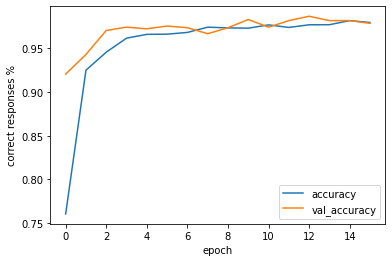

In [14]:
plt.plot(history.history['accuracy'],
         label='accuracy')
plt.plot(history.history['val_accuracy'],
         label='val_accuracy')
plt.xlabel('epoch')
plt.ylabel('correct responses %')
plt.legend()
plt.show()

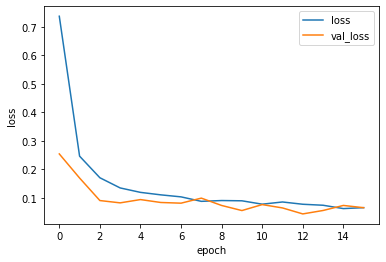

In [15]:
plt.plot(history.history['loss'],
         label='loss')
plt.plot(history.history['val_loss'],
         label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [16]:
model.save('es_func_folder.h5')